<a href="https://colab.research.google.com/github/nishithaNsingh/DSA-Bootcamp-Java/blob/main/obj_dect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install google-colab


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [ ]:
print(frozen_model)
print(config_file)

frozen_inference_graph.pb
ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt


In [ ]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [ ]:
classLabels = []
file_name = "labels.txt"
with open(file_name, 'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')

In [ ]:
print (classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
print (len(classLabels))

80


In [ ]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

< cv2.dnn.Model 0x792af5c05d90>

In [ ]:
img = cv2.imread("Aeroplan.jpg")

In [ ]:
print(type(img))

<class 'numpy.ndarray'>


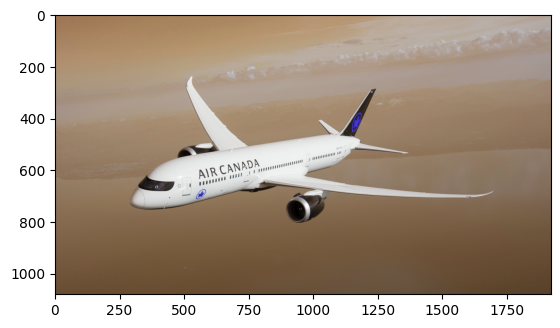

In [ ]:
plt.imshow(img)

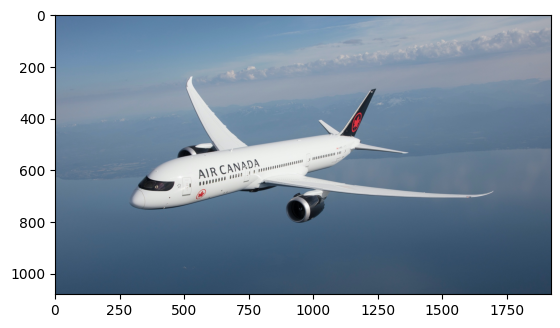

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
ClassIndex , confidece , bbox = model.detect(img,confThreshold = 0.5)

In [ ]:
print(ClassIndex)

[5]


In [ ]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
  cv2.rectangle(img,boxes,(255,0,0), 2)
  cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0), thickness =3)

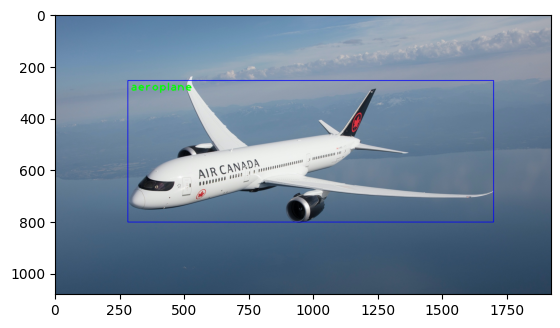

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
from inspect import classify_class_attrs
from google.colab.patches import cv2_imshow
# cap = cv2.VideoCapture("/content/12702 Hussain Sagar Express Entering Solapur Railway Station _ Indian Railways.mp4")
cap = cv2.VideoCapture(0)

if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
  ret,frame = cap.read()

  ClassIndex, confidece, bbox = model.detect(frame,confThreshold = 0.55)

  print(ClassIndex)
  if(len(ClassIndex)!=0):
    for ClassInd,conf, boxes in zip(ClassIndex.flatten(),confidece.flatten(), bbox):
      if(ClassInd<=80):
        cv2.rectangle(frame,boxes,(255,0,0), 2 )
        cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

  cv2_imshow(frame)
  if cv2.waitKey(2) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()

OSError: Cannot open video